# Data Analysis of Sales and Rent data in NSW, Australia

## Group 5


> Aarushi Chaudhary - **46113908**  
> Ameer Ali Mavani - **46812342**  
> Arnav Bajaj- **46806423**  
> Kaveri Bhatia Chanana - **46282920**

## Data

Rent and Sales data - [NSW Department of Family and Community Service](https://www.facs.nsw.gov.au/resources/statistics/rent-and-sales/dashboard)

Income Data - [Australian Bureau of Statistics Census](https://www.abs.gov.au/statistics/labour/earnings-and-work-hours/personal-income-australia/latest-release#data-download)

Crime Data - [NSW Bureau of Crime Statistics and Research](https://www.bocsar.nsw.gov.au/)

## Introduction

The property market in New South Wales, particularly in Sydney, has been rising in recent years. The cost has increased by [nearly 15%](https://propertyupdate.com.au/property-investment-sydney/) in the last year. As the number of individuals coming to NSW to study or work increases, everyone should be able to find a sustainable and suitable home to live that is both affordable and safe. We will utilize data on income, crime, housing sales and rent to characterize all of NSW’s Local Government Areas (LGAs) and see if there is a relationship between them.

## Problem Statement and Goals

- To predict the number of house sales for all LGA's based on the crime rate and income data.  
- Clustering LGAs based on Rent, Sales, crime and Income etc.
- Classification model based on rent, sales, crime and income data.
- To find the average rental cost per LGA.   
- To find the average sales prices for all LGAs.  
- To find the most and the least popular LGA for renting as well as sales prices.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing, Cleaning, Exploration and Visulatization of Data

In [2]:
rent = pd.read_csv('files/rent.csv')
sales = pd.read_csv('files/sales.csv')
crime = pd.read_csv("files/Crime.csv")
income = pd.read_csv("files/Income.csv")

### Rent Data

In [3]:
rent.head()

,Greater Metropolitan Region (GMR),Greater Sydney,Rings,Local Government Area (LGA),Dwelling Types,Number of Bedrooms,First Quartile Weekly Rent for New Bonds\n$,Median Weekly Rent for New Bonds\n$,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total Bonds Held\nNo.,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
0,Total,Total,Total,Total,Total,Total,380,475,600,"78,448","8,20,712",1.06%,3.26%,-8.42%,-1.68%
1,Total,Total,Total,Total,Total,Bedsitter,280,330,400,"1,262","10,433",1.54%,-5.71%,-18.89%,12.68%
2,Total,Total,Total,Total,Total,1 Bedroom,320,415,495,"14,934","1,21,447",1.22%,-1.19%,-14.09%,3.53%
3,Total,Total,Total,Total,Total,Not Specified,300,400,510,"1,442","41,363",0.00%,-2.44%,3.30%,-21.03%
4,Total,Total,Total,Total,Total,2 Bedrooms,370,450,590,"31,498","3,08,268",-2.17%,-2.17%,-9.31%,3.10%


In [4]:
rent = rent.drop(['Quarterly change in Median Weekly Rent','Annual change in Median Weekly Rent','Quarterly change in New Bonds Lodged','Annual change in New Bonds Lodged'], axis = 1)

In [5]:
rent.shape

(33115, 11)

In [6]:
## Filtering data to only get LGA
filter1= rent['Greater Metropolitan Region (GMR)'] == "Total"
filter2= rent['Rings'] == "Total"
filter3= rent['Greater Sydney'] == "Total"
all_filters= filter1&filter2&filter3
rent = rent[all_filters]
rent = rent.drop(['Rings', 'Greater Metropolitan Region (GMR)', 'Greater Sydney'], axis=1)
rent = rent.iloc[1:]
rent = rent.reset_index()
rent = rent.drop(['index'], axis=1)


## Renaming columns
rent.rename(columns={"First Quartile Weekly Rent for New Bonds\n$": "First_Quartile_Weekly_Rent",
                      "Median Weekly Rent for New Bonds\n$": "Median_Weekly_Rent",
                     "Third Quartile Weekly Rent for New Bonds\n$": "Third Quartile_Weekly_Rent",
                     "New Bonds Lodged\nNo.": "New_Bonds_Lodged",
                     "Total Bonds Held\nNo.": "Total_Bonds","Local Government Area (LGA)":"LGA"}, inplace=True)

#Replacing s and 

rent = rent.replace(to_replace =["s"],value = "15")
rent = rent.replace(to_replace =["-"],value = "0")

In [7]:
rent.head()

,LGA,Dwelling Types,Number of Bedrooms,First_Quartile_Weekly_Rent,Median_Weekly_Rent,Third Quartile_Weekly_Rent,New_Bonds_Lodged,Total_Bonds
0,Total,Total,Bedsitter,280,330,400,"1,262","10,433"
1,Total,Total,1 Bedroom,320,415,495,"14,934","1,21,447"
2,Total,Total,Not Specified,300,400,510,"1,442","41,363"
3,Total,Total,2 Bedrooms,370,450,590,"31,498","3,08,268"
4,Total,Total,3 Bedrooms,420,500,650,"19,355","2,27,704"


In [8]:
rent.shape

(4029, 8)

In [9]:
rent['Median_Weekly_Rent'] = rent['Median_Weekly_Rent'].replace('[^\d.]','', regex=True).astype(float)
rent['Dwelling Types'] = rent['Dwelling Types'].astype('str')
rent['LGA'] = rent['LGA'].astype('str')

In [10]:
mean = rent['Median_Weekly_Rent'].mean()
mean

186.271034996277

In [11]:
group_rent = rent.groupby('LGA').agg({'Median_Weekly_Rent':'mean'})
group_rent = group_rent.reset_index()
group_rent

,LGA,Median_Weekly_Rent
0,Albury,150.558824
1,Armidale Regional,142.029412
2,Ballina,268.470588
3,Balranald,0.000000
4,Bathurst Regional,144.647059
...,...,...
124,Wingecarribee,192.823529
125,Wollondilly,146.090909
126,Wollongong,281.885714
127,Woollahra,496.029412


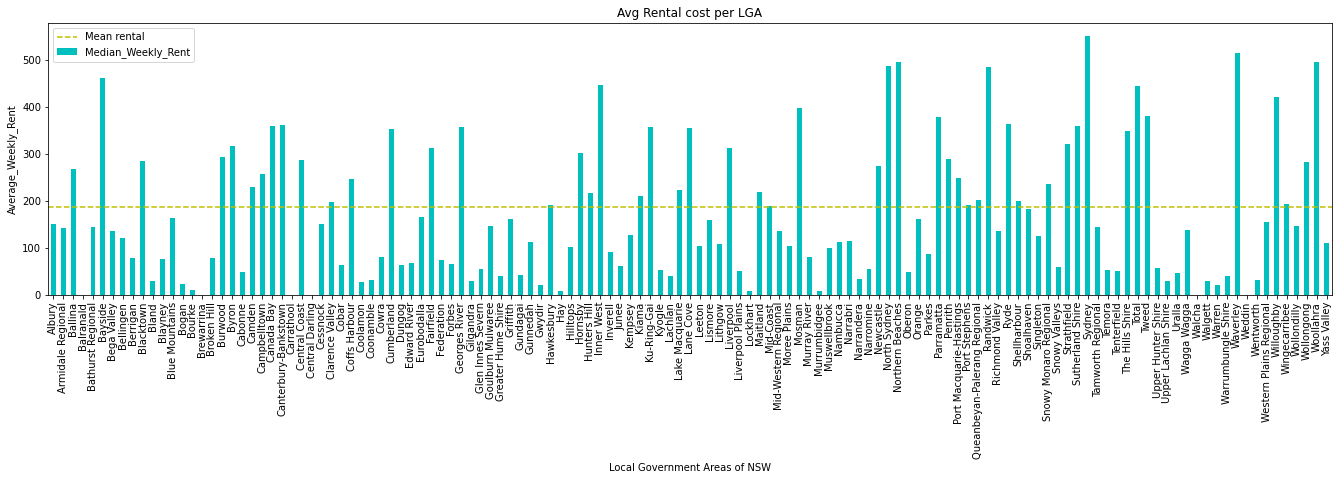

In [12]:
group_rent.plot(kind='bar', figsize=(23, 5), rot=90, x='LGA', y='Median_Weekly_Rent', facecolor='c') # rotate the bars by 90 degrees

plt.axhline(mean, color='y', linestyle='--', label='Mean rental') ## find the mean price amongst all the LGA's

plt.xlabel('Local Government Areas of NSW', size=10)
plt.ylabel('Average_Weekly_Rent', size=10)
plt.title('Avg Rental cost per LGA')
plt.legend()
plt.show()

The above bar graph, represents the average rent for all LGA's in the 2nd quarter(July 2021). The yellow line represents the average rental mean, which represents the average of all LGA's which is $186.27. And the highest rental cost is in Sydney. 

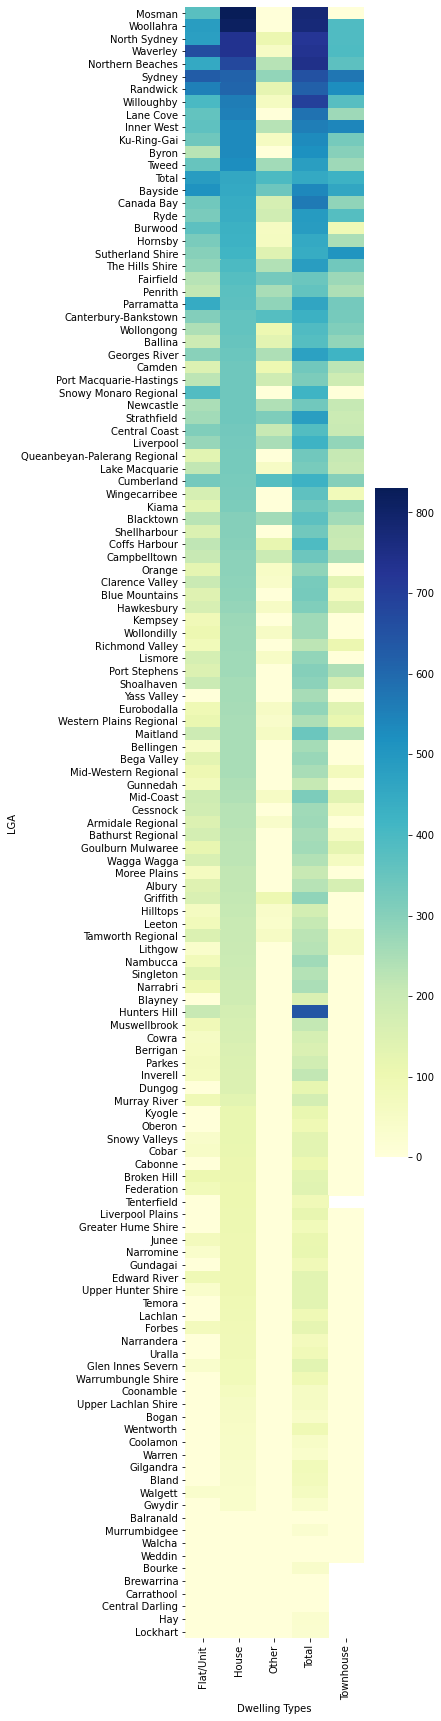

In [13]:
heatmap1_data = pd.pivot_table(rent,values='Median_Weekly_Rent', index=['LGA'], columns='Dwelling Types')
hm=heatmap1_data.sort_values(["House", "Flat/Unit", "Other", "Townhouse"], ascending = (False, False,False,False))
plt.figure(figsize=(4,30))
sns.heatmap(hm, cmap="YlGnBu")
plt.show()

The above heatmap, represents different dwelling types distribution among all LGA's in New South Wales.

### Sales Data

In [14]:
sales.head(10)

,Greater Metropolitan Region (GMR),Greater Sydney,Rings,Local Government Area (LGA),DwellingType,First Quartile Sales Price\n$'000s,Median Sales Price\n$'000s,Third Quartile Sales Price\n'000s,Mean Sales Price\n$'000s,Sales\nNo.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
0,Total,Total,Total,Total,Total,540,740,1074,955,"37,195",2.07%,8.07%,-10.52%,37.79%
1,Total,Total,Total,Total,Non Strata,540,770,1200,1014,"24,156",2.67%,12.41%,-14.27%,38.78%
2,Total,Total,Total,Total,Strata,540,695,912,846,"13,039",1.02%,2.21%,-2.64%,35.99%
3,Total,Total,Total,Albury,Total,299,380,500,403,361,2.56%,19.12%,-10.64%,34.70%
4,Total,Total,Total,Albury,Non Strata,340,413,530,443,285,-0.12%,19.02%,-14.67%,31.34%
5,Total,Total,Total,Albury,Strata,178,221,299,251,76,-4.74%,2.79%,8.57%,49.02%
6,Total,Total,Total,Armidale Regional,Total,296,355,455,403,179,-6.58%,7.58%,14.01%,110.59%
7,Total,Total,Total,Armidale Regional,Non Strata,310,372,459,408,154,-2.24%,12.58%,6.21%,81.18%
8,Total,Total,Total,Armidale Regional,Strata,200,269,355,373,s,-29.53%,NaN,108.33%,NaN
9,Total,Total,Total,Ballina,Total,635,795,1143,927,218,8.16%,20.00%,-22.42%,57.97%


In [15]:
## Renaming columns
sales.rename(columns={"First Quartile Sales Price\n$'000s": "First_Quartile_Sales_Price",
                      "Median Sales Price\n$'000s": "Median_Sales_Price",
                     "Third Quartile Sales Price\n'000s": "Third_Quartile_Sales_Price",
                     "Mean Sales Price\n$'000s": "Mean_Sales_Price",
                     "Sales\nNo.": "Number_of_Sales", "Local Government Area (LGA)":"LGA"}, inplace=True)

## Dropping quarterly and annual change data
sales1 = sales.drop(['Qtly change in Median','Annual change in Median','Qtly change in Count','Annual change in Count'], axis=1)


## Filtering data to only get LGA wise data
filter4= sales1['Greater Metropolitan Region (GMR)'] == "Total"
filter5= sales1['Rings'] == "Total"
filter6= sales1['Greater Sydney'] == "Total"
all_filters= filter4&filter5&filter6
sales2 = sales1[all_filters]

## dropping and resetting index for the columns
sales2 = sales2.drop(['Rings', 'Greater Metropolitan Region (GMR)', 'Greater Sydney'], axis=1)
sales2 = sales2.iloc[1:]
sales2 = sales2.reset_index()
sales2 = sales2.drop(['index'], axis=1)



#Replacing s with 15 and - with 0 
sales2 = sales2.replace(to_replace =["s"],value = "15")
sales2 = sales2.replace(to_replace =["-"],value = "0")

## selecting the row only with the LGA, i.e ignoring the top 3 'Total' in LGA and resetting index
sales2= sales2.iloc[2:]
sales2= sales2.reset_index()
sales2 = sales2.drop(['index'], axis=1)
sales2

,LGA,DwellingType,First_Quartile_Sales_Price,Median_Sales_Price,Third_Quartile_Sales_Price,Mean_Sales_Price,Number_of_Sales
0,Albury,Total,299,380,500,403,361
1,Albury,Non Strata,340,413,530,443,285
2,Albury,Strata,178,221,299,251,76
3,Armidale Regional,Total,296,355,455,403,179
4,Armidale Regional,Non Strata,310,372,459,408,154
...,...,...,...,...,...,...,...
337,Woollahra,Total,1350,2195,4175,2951,306
338,Woollahra,Non Strata,2990,4287,5828,4594,107
339,Woollahra,Strata,1150,1640,2490,2067,199
340,Yass Valley,Total,526,750,996,775,72


In [16]:
#Converting from object to numeric
sales2.dtypes

LGA                           object
DwellingType                  object
First_Quartile_Sales_Price    object
Median_Sales_Price            object
Third_Quartile_Sales_Price    object
Mean_Sales_Price              object
Number_of_Sales               object
dtype: object

In [17]:
sales2["First_Quartile_Sales_Price"] = pd.to_numeric(sales2["First_Quartile_Sales_Price"])
sales2["Median_Sales_Price"] = pd.to_numeric(sales2["Median_Sales_Price"])
sales2["Third_Quartile_Sales_Price"] = pd.to_numeric(sales2["Third_Quartile_Sales_Price"])
sales2["Mean_Sales_Price"] = pd.to_numeric(sales2["Mean_Sales_Price"])
sales2["Number_of_Sales"] = sales2["Number_of_Sales"].str.replace(',', '').astype(int)
sales2["Number_of_Sales"] = pd.to_numeric(sales2["Number_of_Sales"])
sales2.dtypes

LGA                           object
DwellingType                  object
First_Quartile_Sales_Price     int64
Median_Sales_Price             int64
Third_Quartile_Sales_Price     int64
Mean_Sales_Price               int64
Number_of_Sales                int32
dtype: object

In [18]:
sales2.head()

,LGA,DwellingType,First_Quartile_Sales_Price,Median_Sales_Price,Third_Quartile_Sales_Price,Mean_Sales_Price,Number_of_Sales
0,Albury,Total,299,380,500,403,361
1,Albury,Non Strata,340,413,530,443,285
2,Albury,Strata,178,221,299,251,76
3,Armidale Regional,Total,296,355,455,403,179
4,Armidale Regional,Non Strata,310,372,459,408,154


In [19]:
sales2.shape

(342, 7)

In [20]:
grouping_sales = sales2[sales2["DwellingType"] == "Total"]
grouping_sales1 = grouping_sales.groupby('LGA')['Number_of_Sales'].sum()
grouping_sales1 = grouping_sales.reset_index()
grouping_sales1

,index,LGA,DwellingType,First_Quartile_Sales_Price,Median_Sales_Price,Third_Quartile_Sales_Price,Mean_Sales_Price,Number_of_Sales
0,0,Albury,Total,299,380,500,403,361
1,3,Armidale Regional,Total,296,355,455,403,179
2,6,Ballina,Total,635,795,1143,927,218
3,9,Balranald,Total,0,0,0,0,0
4,11,Bathurst Regional,Total,371,460,550,472,262
...,...,...,...,...,...,...,...,...
123,328,Wingecarribee,Total,702,900,1280,1035,386
124,331,Wollondilly,Total,661,813,1129,900,202
125,334,Wollongong,Total,577,720,922,793,900
126,337,Woollahra,Total,1350,2195,4175,2951,306


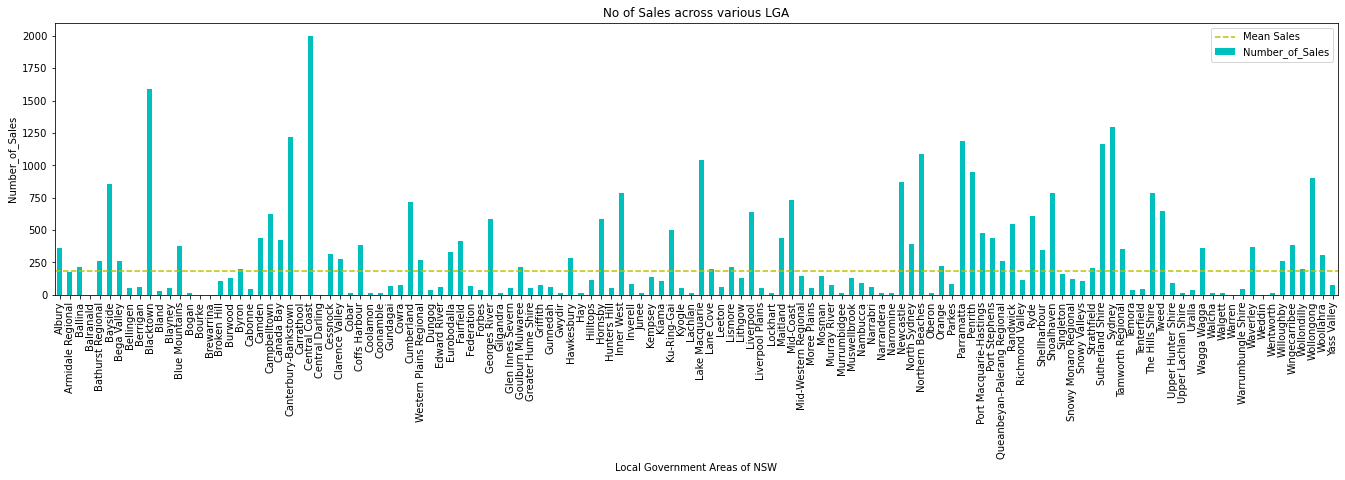

In [21]:
grouping_sales1.plot(kind='bar', figsize=(23, 5), rot=90, x='LGA', y='Number_of_Sales', facecolor='c') # rotate the bars by 90 degrees
plt.axhline(mean, color='y', linestyle='--', label='Mean Sales')
plt.xlabel('Local Government Areas of NSW', size=10)
plt.ylabel('Number_of_Sales', size=10)
plt.title('No of Sales across various LGA')
plt.legend()
plt.show()

**Analysis**

From the above graph, we can infer that Central Coast LGA has the highest number of sales. This is followed by Blacktown LGA

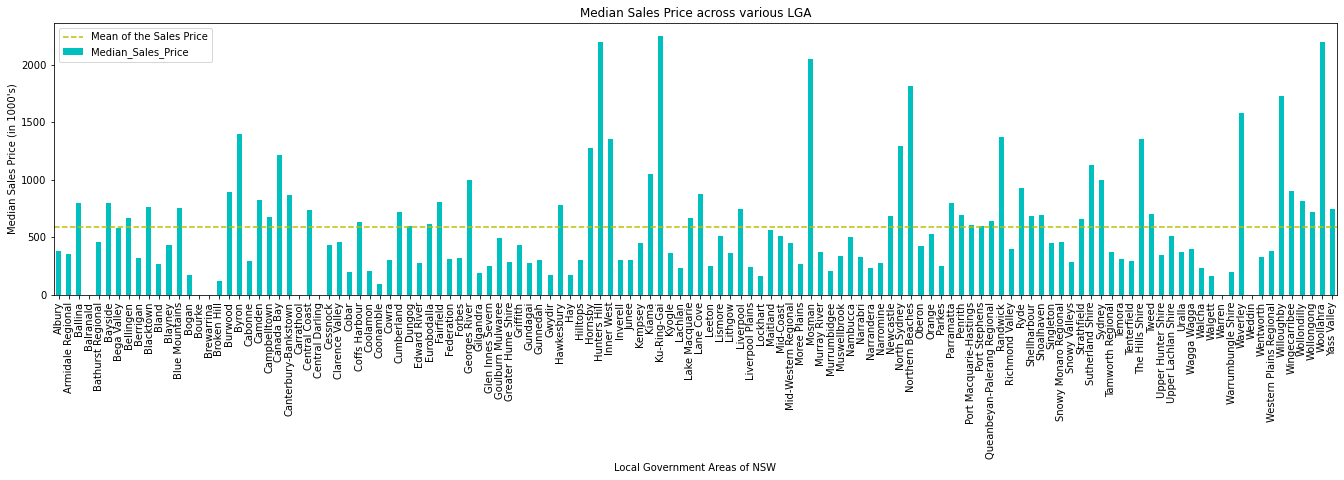

In [22]:
grouping_sales_price = grouping_sales.groupby('LGA')['Median_Sales_Price'].sum()
grouping_sales_price = grouping_sales_price.reset_index()
mean2 = grouping_sales_price['Median_Sales_Price'].mean()

grouping_sales_price.plot(kind='bar', figsize=(23, 5), rot=90, x='LGA', y='Median_Sales_Price', facecolor='c')
plt.axhline(mean2, color='y', linestyle='--', label='Mean of the Sales Price')
plt.xlabel('Local Government Areas of NSW', size=10)
plt.ylabel("Median Sales Price (in 1000's)", size=10)
plt.title('Median Sales Price across various LGA')
plt.legend()
plt.show()

**Analysis**

From the above graph, we can infer that Ku-Ring-Gai has the highest house prices at almost AUD 2 Million followed by Hunter's Hill, Woolahara and Mossman. The Average house price is around AUD 600,000

### Crime Data

In [23]:
crime.head()

,LGA,Offence category,Subcategory,Jan 1995,Feb 1995,Mar 1995,Apr 1995,May 1995,Jun 1995,Jul 1995,...,Sep 2020,Oct 2020,Nov 2020,Dec 2020,Jan 2021,Feb 2021,Mar 2021,Apr 2021,May 2021,Jun 2021
0,Albury,Homicide,Murder *,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Albury,Homicide,Attempted murder,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Albury,Homicide,"Murder accessory, conspiracy",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Albury,Homicide,Manslaughter *,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Albury,Assault,Domestic violence related assault,7,7,7,2,7,6,4,...,23,25,30,29,34,45,30,21,22,30


In [24]:
#restricting from Jan 21 till June 2021
crime1=crime[['LGA', 'Offence category','Jan 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'May 2021',
       'Jun 2021']]
crime1.head

<bound method NDFrame.head of              LGA               Offence category  Jan 2021  Feb 2021  Mar 2021  \
0         Albury                       Homicide         0         0         1   
1         Albury                       Homicide         0         0         0   
2         Albury                       Homicide         0         0         0   
3         Albury                       Homicide         0         0         0   
4         Albury                        Assault        34        45        30   
...          ...                            ...       ...       ...       ...   
8117  In Custody     Against justice procedures         0         0         0   
8118  In Custody     Against justice procedures         0         1         0   
8119  In Custody     Against justice procedures         3         3         3   
8120  In Custody  Transport regulatory offences         0         0         0   
8121  In Custody                 Other offences         4        11        14  

In [25]:
crime1.shape

(8122, 8)

In [26]:
#add total of 2021
crime1['Total_Crimes'] = crime1.sum(axis=1)
crime1.rename(columns = {'Offence category':'Category'}, inplace = True)
crime1.head()

,LGA,Category,Jan 2021,Feb 2021,Mar 2021,Apr 2021,May 2021,Jun 2021,Total_Crimes
0,Albury,Homicide,0,0,1,0,0,0,1
1,Albury,Homicide,0,0,0,0,1,0,1
2,Albury,Homicide,0,0,0,0,0,0,0
3,Albury,Homicide,0,0,0,0,0,0,0
4,Albury,Assault,34,45,30,21,22,30,182


In [27]:
#get rid of months
crime2=crime1[['LGA', 'Category','Total_Crimes']]
crime2.shape

(8122, 3)

In [28]:
crime2.head(10)

,LGA,Category,Total_Crimes
0,Albury,Homicide,1
1,Albury,Homicide,1
2,Albury,Homicide,0
3,Albury,Homicide,0
4,Albury,Assault,182
5,Albury,Assault,181
6,Albury,Assault,15
7,Albury,Sexual offences,39
8,Albury,Sexual offences,36
9,Albury,Abduction and kidnapping,0


In [29]:
df_gr=crime2.groupby(['LGA','Category']).sum().reset_index()
df_gr.head()

,LGA,Category,Total_Crimes
0,Albury,Abduction and kidnapping,0
1,Albury,Against justice procedures,452
2,Albury,Arson,24
3,Albury,Assault,378
4,Albury,Betting and gaming offences,0


In [30]:
ps1 = df_gr.pivot(index='LGA', columns= 'Category')
ps1.head(20)

Total_Crimes                                   \
Category          Abduction and kidnapping Against justice procedures Arson   
LGA                                                                           
Albury                                   0                        452    24   
Armidale Regional                        0                        170    14   
Ballina                                  0                        197     9   
Balranald                                0                          2     0   
Bathurst Regional                        0                        332    19   
Bayside                                  4                        430    11   
Bega Valley                              0                         83    11   
Bellingen                                0                         36     3   
Berrigan                                 0                         27     0   
Blacktown                                2                       2181    84   
Bland                                    0                         10     0   
Blayney                                  0                         22     4   
Blue Mountains                           2                        212     6   
Bogan                                    0                         29     0   
Bourke                                   0                        179    13   
Brewarrina                               1                         95     8   
Broken Hill                              0                        311    11   
Burwood                                  3                        174     1   
Byron                                    0                        121     8   
Cabonne                                  0                         19     4   

                                                                               \
Category          Assault Betting and gaming offences Blackmail and extortion   
LGA                                                                             
Albury                378                           0                       1   
Armidale Regional     240                           0                       0   
Ballina               136                           0                       0   
Balranald               4                           1                       0   
Bathurst Regional     368                           0                       0   
Bayside               544                           1                       1   
Bega Valley           123                           0                       0   
Bellingen              60                           0                       0   
Berrigan               35                           0                       0   
Blacktown            2172                           1                       9   
Bland                  30                           0                       0   
Blayney                34                           0                       0   
Blue Mountains        206                           0                       0   
Bogan                  12                           0                       0   
Bourke                106                           0                       0   
Brewarrina             42                           0                       0   
Broken Hill           227                           0                       0   
Burwood               105                           0                       0   
Byron                 170                           0                       0   
Cabonne                26                           0                       0   

                                                             \
Category          Disorderly conduct Drug offences Homicide   
LGA                                                           
Albury                           107           260        2   
Armidale Regional                 70            75        0   
Ballina                          

In [31]:
grouped_crime =df_gr.groupby('LGA').agg({'Total_Crimes':'sum'})
grouped_crime = grouped_crime.reset_index()
mean3 = grouped_crime['Total_Crimes'].mean()
grouped_crime

,LGA,Total_Crimes
0,Albury,3208
1,Armidale Regional,1636
2,Ballina,1208
3,Balranald,49
4,Bathurst Regional,2256
...,...,...
126,Wingecarribee,1156
127,Wollondilly,805
128,Wollongong,9484
129,Woollahra,1164


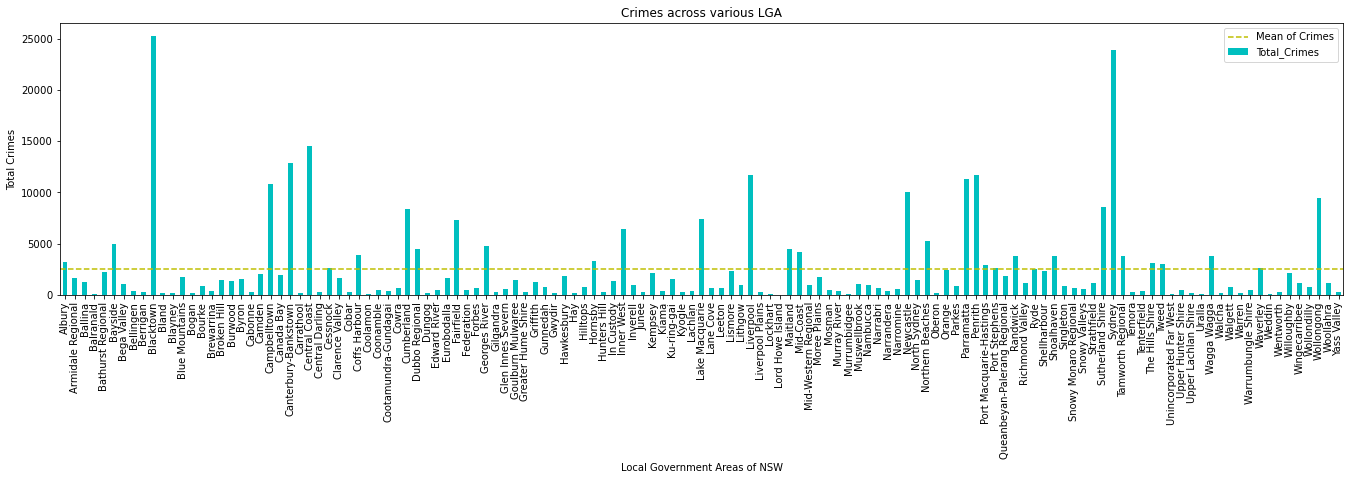

In [32]:
grouped_crime.plot(kind='bar', figsize=(23, 5), rot=90, x='LGA', y='Total_Crimes', facecolor='c') # rotate the bars by 90 degrees
plt.axhline(mean3, color='y', linestyle='--', label='Mean of Crimes')
plt.xlabel('Local Government Areas of NSW', size=10)
plt.ylabel('Total Crimes', size=10)
plt.title('Crimes across various LGA')
plt.legend()
plt.show()

**Analysis**  

From the above graph, it is evident that maximum total no of crimes are committed in Blacktown LGA.
The second highest crimes committed in observed in Sydney LGA. 

### Income Data

In [33]:
income.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Percentile ratos,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Income share,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,Earners,Median age of earners,Sum,Median,Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
1,LGA,LGA NAME,(persons),years,$,$,$,ratio,ratio,ratio,ratio,coef.,%,%,%,%,%,%,%
2,Australia,NaN,"1,40,69,082",42,"9,03,88,86,74,402","49,805","64,246",5.02,1.88,0.37,0.16,0.483,9.6,22.6,33.6,25.0,25.0,25.0,25.0
3,New South Wales,NaN,"44,66,941",42,"3,00,17,69,88,652","50,153","67,200",5.11,1.91,0.37,0.16,0.499,11.2,24.5,35.5,25.0,24.7,24.4,26.0
4,10050,Albury,"29,898",43,"1,68,65,39,002","47,732","56,410",4.59,1.75,0.38,0.16,0.442,7.7,19.4,29.7,25.1,27.0,27.6,20.2
5,10130,Armidale Regional,"15,913",44,"82,86,31,202","42,220","52,073",5.56,1.91,0.34,0.13,0.480,7.5,20.0,31.3,30.1,28.0,23.2,18.7
6,10250,Ballina,"25,608",48,"1,38,05,01,523","42,246","53,909",5.49,1.91,0.35,0.13,0.488,8.8,22.1,33.2,29.6,28.6,23.1,18.7
7,10300,Balranald,"1,239",45,"6,93,45,495","46,868","55,969",4.09,1.73,0.42,0.16,0.456,6.3,20.5,31.9,24.8,29.1,28.1,18.1
8,10470,Bathurst Regional,"22,346",44,"1,30,18,20,483","49,633","58,257",4.74,1.81,0.38,0.16,0.437,5.8,17.5,28.2,24.1,26.0,26.0,23.9
9,10500,Bayside,"1,01,523",37,"6,09,32,77,110","49,445","60,019",4.60,1.82,0.40,0.19,0.445,6.6,18.8,29.8,24.6,25.8,26.0,23.6


In [34]:
income.columns = [income.iloc[0], income.iloc[1]]

income1 = income[2:]
income1.head(20)

0               NaN                         Earners Median age of earners  \
1               LGA           LGA NAME    (persons)                 years   
2        Australia                 NaN  1,40,69,082                    42   
3   New South Wales                NaN    44,66,941                    42   
4             10050             Albury       29,898                    43   
5             10130  Armidale Regional       15,913                    44   
6             10250            Ballina       25,608                    48   
7             10300          Balranald        1,239                    45   
8             10470  Bathurst Regional       22,346                    44   
9             10500            Bayside     1,01,523                    37   
10            10550        Bega Valley       19,742                    51   
11            10600          Bellingen        6,953                    51   
12            10650           Berrigan        4,584                    48   
13            10750          Blacktown     1,95,437                    38   
14            10800              Bland        3,136                    47   
15            10850            Blayney        3,967                    47   
16            10900     Blue Mountains       46,244                    47   
17            10950              Bogan        1,547                    45   
18            11150             Bourke        1,313                    43   
19            11200         Brewarrina          595                    45   
20            11250        Broken Hill        8,519                    44   
21            11300            Burwood       23,592                    36   

0                 Sum  Median    Mean P80/P20 P80/P50 P20/P50 P10/P50  \
1                   $       $       $   ratio   ratio   ratio   ratio   
2   9,03,88,86,74,402  49,805  64,246    5.02    1.88    0.37    0.16   
3   3,00,17,69,88,652  50,153  67,200    5.11    1.91    0.37    0.16   
4      1,68,65,39,002  47,732  56,410    4.59    1.75    0.38    0.16   
5        82,86,31,202  42,220  52,073    5.56    1.91    0.34    0.13   
6      1,38,05,01,523  42,246  53,909    5.49    1.91    0.35    0.13   
7         6,93,45,495  46,868  55,969    4.09    1.73    0.42    0.16   
8      1,30,18,20,483  49,633  58,257    4.74    1.81    0.38    0.16   
9      6,09,32,77,110  49,445  60,019    4.60    1.82    0.40    0.19   
10       91,57,83,256  38,318  46,388    5.70    1.89    0.33    0.12   
11       31,05,17,376  35,924  44,659    6.58    2.00    0.30    0.09   
12       21,28,46,180  40,157  46,432    5.56    1.83    0.33    0.11   
13    11,50,68,93,919  52,802  58,878    4.06    1.68    0.41    0.20   
14       15,59,14,366  40,816  49,718    6.43    1.97    0.31    0.08   
15       22,38,64,442  47,530  56,432    5.08    1.87    0.37    0.13   
16     2,85,98,77,915  49,788  61,843    5.66    1.96    0.35    0.14   
17        8,31,70,439  45,717  53,762    5.74    1.94    0.34    0.08   
18        7,29,45,725  50,405  55,557    4.80    1.73    0.36    0.15   
19        2,79,40,239  44,520  46,958    6.08    1.77    0.29    0.08   
20       50,57,42,189  50,628  59,366    4.66    1.85    0.40    0.18   
21     1,32,99,26,689  40,562  56,372    5.73    2.09    0.37    0.15   

0  Gini coefficient Top 1% Top 5% Top 10% Lowest Quartile Second Quartile  \
1             coef.      %      %       %               %               %   
2             0.483    9.6   22.6    33.6            25.0            25.0   
3             0.499   11.2   24.5    35.5            25.0            24.7   
4             0.442    7.7   19.4    29.7            25.1            27.0   
5             0.480    7.5   20.0    31.3            30.1            28.0   
6             0.488    8.8   22.1    33.2            29.6            28.6   
7             0.456    6.3   20.5    31.9            24.8            29.1   
8             0.437    5.8   17.5    28.2            24.1            26.0   
9    

In [35]:
income2 = income1.copy()
#remove first level of MultiIndex
income2.columns = income2.columns.droplevel(1)
income2.head()

,NaN,NaN,Earners,Median age of earners,Sum,Median,Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
2,Australia,NaN,"1,40,69,082",42,"9,03,88,86,74,402","49,805","64,246",5.02,1.88,0.37,0.16,0.483,9.6,22.6,33.6,25.0,25.0,25.0,25.0
3,New South Wales,NaN,"44,66,941",42,"3,00,17,69,88,652","50,153","67,200",5.11,1.91,0.37,0.16,0.499,11.2,24.5,35.5,25.0,24.7,24.4,26.0
4,10050,Albury,"29,898",43,"1,68,65,39,002","47,732","56,410",4.59,1.75,0.38,0.16,0.442,7.7,19.4,29.7,25.1,27.0,27.6,20.2
5,10130,Armidale Regional,"15,913",44,"82,86,31,202","42,220","52,073",5.56,1.91,0.34,0.13,0.480,7.5,20.0,31.3,30.1,28.0,23.2,18.7
6,10250,Ballina,"25,608",48,"1,38,05,01,523","42,246","53,909",5.49,1.91,0.35,0.13,0.488,8.8,22.1,33.2,29.6,28.6,23.1,18.7


In [36]:
income2.columns

Index([                    nan,                     nan,
                     'Earners', 'Median age of earners',
                         'Sum',                'Median',
                        'Mean',               'P80/P20',
                     'P80/P50',               'P20/P50',
                     'P10/P50',      'Gini coefficient',
                      'Top 1%',                'Top 5%',
                     'Top 10%',       'Lowest Quartile',
             'Second Quartile',        'Third Quartile',
            'Highest Quartile'],
      dtype='object', name=0)

In [37]:
#Dropping the first 2 rows with sum totals

income3 = income2.iloc[2:]
income3.head()

,NaN,NaN,Earners,Median age of earners,Sum,Median,Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
4,10050,Albury,"29,898",43,"1,68,65,39,002","47,732","56,410",4.59,1.75,0.38,0.16,0.442,7.7,19.4,29.7,25.1,27.0,27.6,20.2
5,10130,Armidale Regional,"15,913",44,"82,86,31,202","42,220","52,073",5.56,1.91,0.34,0.13,0.480,7.5,20.0,31.3,30.1,28.0,23.2,18.7
6,10250,Ballina,"25,608",48,"1,38,05,01,523","42,246","53,909",5.49,1.91,0.35,0.13,0.488,8.8,22.1,33.2,29.6,28.6,23.1,18.7
7,10300,Balranald,"1,239",45,"6,93,45,495","46,868","55,969",4.09,1.73,0.42,0.16,0.456,6.3,20.5,31.9,24.8,29.1,28.1,18.1
8,10470,Bathurst Regional,"22,346",44,"1,30,18,20,483","49,633","58,257",4.74,1.81,0.38,0.16,0.437,5.8,17.5,28.2,24.1,26.0,26.0,23.9


In [38]:
#income3.index = range(len(income3))

# starting the index with 1
income3.index = np.arange(1, len(income3) + 1)
income3.head()

,NaN,NaN,Earners,Median age of earners,Sum,Median,Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
1,10050,Albury,"29,898",43,"1,68,65,39,002","47,732","56,410",4.59,1.75,0.38,0.16,0.442,7.7,19.4,29.7,25.1,27.0,27.6,20.2
2,10130,Armidale Regional,"15,913",44,"82,86,31,202","42,220","52,073",5.56,1.91,0.34,0.13,0.480,7.5,20.0,31.3,30.1,28.0,23.2,18.7
3,10250,Ballina,"25,608",48,"1,38,05,01,523","42,246","53,909",5.49,1.91,0.35,0.13,0.488,8.8,22.1,33.2,29.6,28.6,23.1,18.7
4,10300,Balranald,"1,239",45,"6,93,45,495","46,868","55,969",4.09,1.73,0.42,0.16,0.456,6.3,20.5,31.9,24.8,29.1,28.1,18.1
5,10470,Bathurst Regional,"22,346",44,"1,30,18,20,483","49,633","58,257",4.74,1.81,0.38,0.16,0.437,5.8,17.5,28.2,24.1,26.0,26.0,23.9


In [39]:
df = income3.rename(columns={np.nan: 'LGA'})
df

,LGA,LGA,Earners,Median age of earners,Sum,Median,Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
1,10050,Albury,"29,898",43,"1,68,65,39,002","47,732","56,410",4.59,1.75,0.38,0.16,0.442,7.7,19.4,29.7,25.1,27.0,27.6,20.2
2,10130,Armidale Regional,"15,913",44,"82,86,31,202","42,220","52,073",5.56,1.91,0.34,0.13,0.480,7.5,20.0,31.3,30.1,28.0,23.2,18.7
3,10250,Ballina,"25,608",48,"1,38,05,01,523","42,246","53,909",5.49,1.91,0.35,0.13,0.488,8.8,22.1,33.2,29.6,28.6,23.1,18.7
4,10300,Balranald,"1,239",45,"6,93,45,495","46,868","55,969",4.09,1.73,0.42,0.16,0.456,6.3,20.5,31.9,24.8,29.1,28.1,18.1
5,10470,Bathurst Regional,"22,346",44,"1,30,18,20,483","49,633","58,257",4.74,1.81,0.38,0.16,0.437,5.8,17.5,28.2,24.1,26.0,26.0,23.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
548,Totals may not align with the sum of their com...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
549,np - not published to protect the confidential...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df.columns
df.columns = ['LGA_Codes', 'LGA', 'Number_of_Earners', 'Median_age_of_earners', 'Income_Sum', 'Income_Median',
       'Income_Mean', 'P80/P20', 'P80/P50', 'P20/P50', 'P10/P50', 'Gini coefficient',
       'Top 1%', 'Top 5%', 'Top 10%', 'Lowest Quartile', 'Second Quartile',
       'Third Quartile', 'Highest Quartile']
df.columns

Index(['LGA_Codes', 'LGA', 'Number_of_Earners', 'Median_age_of_earners',
       'Income_Sum', 'Income_Median', 'Income_Mean', 'P80/P20', 'P80/P50',
       'P20/P50', 'P10/P50', 'Gini coefficient', 'Top 1%', 'Top 5%', 'Top 10%',
       'Lowest Quartile', 'Second Quartile', 'Third Quartile',
       'Highest Quartile'],
      dtype='object')

In [41]:
df

,LGA_Codes,LGA,Number_of_Earners,Median_age_of_earners,Income_Sum,Income_Median,Income_Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
1,10050,Albury,"29,898",43,"1,68,65,39,002","47,732","56,410",4.59,1.75,0.38,0.16,0.442,7.7,19.4,29.7,25.1,27.0,27.6,20.2
2,10130,Armidale Regional,"15,913",44,"82,86,31,202","42,220","52,073",5.56,1.91,0.34,0.13,0.480,7.5,20.0,31.3,30.1,28.0,23.2,18.7
3,10250,Ballina,"25,608",48,"1,38,05,01,523","42,246","53,909",5.49,1.91,0.35,0.13,0.488,8.8,22.1,33.2,29.6,28.6,23.1,18.7
4,10300,Balranald,"1,239",45,"6,93,45,495","46,868","55,969",4.09,1.73,0.42,0.16,0.456,6.3,20.5,31.9,24.8,29.1,28.1,18.1
5,10470,Bathurst Regional,"22,346",44,"1,30,18,20,483","49,633","58,257",4.74,1.81,0.38,0.16,0.437,5.8,17.5,28.2,24.1,26.0,26.0,23.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
548,Totals may not align with the sum of their com...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
549,np - not published to protect the confidential...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# filtering LGAs under New South Wales - starting with 1

filter = df['LGA_Codes'] < "20000"
income3 = df[filter]
income3.head(130)

,LGA_Codes,LGA,Number_of_Earners,Median_age_of_earners,Income_Sum,Income_Median,Income_Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
1,10050,Albury,"29,898",43,"1,68,65,39,002","47,732","56,410",4.59,1.75,0.38,0.16,0.442,7.7,19.4,29.7,25.1,27.0,27.6,20.2
2,10130,Armidale Regional,"15,913",44,"82,86,31,202","42,220","52,073",5.56,1.91,0.34,0.13,0.480,7.5,20.0,31.3,30.1,28.0,23.2,18.7
3,10250,Ballina,"25,608",48,"1,38,05,01,523","42,246","53,909",5.49,1.91,0.35,0.13,0.488,8.8,22.1,33.2,29.6,28.6,23.1,18.7
4,10300,Balranald,"1,239",45,"6,93,45,495","46,868","55,969",4.09,1.73,0.42,0.16,0.456,6.3,20.5,31.9,24.8,29.1,28.1,18.1
5,10470,Bathurst Regional,"22,346",44,"1,30,18,20,483","49,633","58,257",4.74,1.81,0.38,0.16,0.437,5.8,17.5,28.2,24.1,26.0,26.0,23.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,18350,Wingecarribee,"29,511",49,"1,87,06,11,314","44,735","63,387",5.77,2.02,0.35,0.13,0.531,12.4,26.6,37.9,28.7,26.0,22.2,23.2
125,18400,Wollondilly,"29,666",43,"1,93,09,27,957","54,811","65,089",4.45,1.79,0.40,0.20,0.433,6.6,18.1,28.7,21.3,24.2,26.1,28.5
126,18450,Wollongong,"1,13,903",43,"7,13,85,41,170","50,484","62,672",5.27,1.90,0.36,0.15,0.459,7.0,19.3,30.4,25.1,24.3,24.0,26.6
127,18500,Woollahra,"39,772",44,"6,86,55,00,179","77,159","1,72,621",6.78,2.32,0.34,0.16,0.680,26.6,46.2,57.3,18.1,17.1,17.9,46.9


In [43]:
income3 = income3.drop(['LGA_Codes', 'P80/P20', 'P80/P50', 'P20/P50','P10/P50','Gini coefficient',
                       'Top 1%','Top 5%','Top 10%','Lowest Quartile','Second Quartile','Third Quartile',
                       'Highest Quartile'], axis = 1)


In [44]:
income_graph = income3.groupby('LGA')['Income_Median'].sum()
income_graph = income_graph.reset_index()
## replacing the , and converting to flaot
income_graph["Income_Median"] = income_graph["Income_Median"].str.replace(',', '').astype(float)
mean4 = income_graph['Income_Median'].mean()

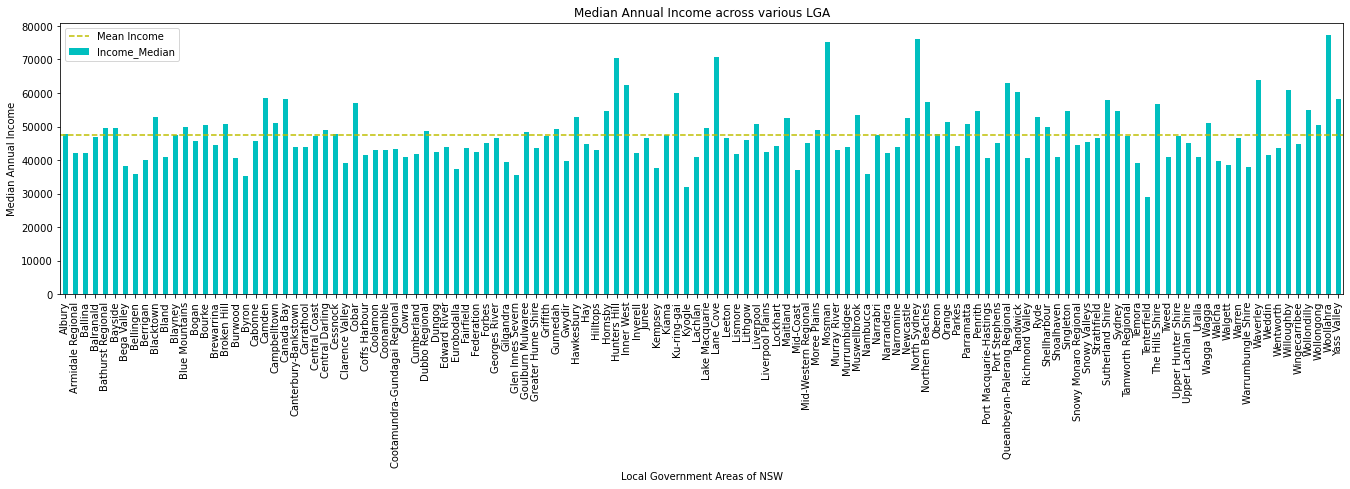

In [45]:
income_graph.plot(kind='bar', figsize=(23, 5), rot=90, x='LGA', y='Income_Median', facecolor='c')
plt.axhline(mean4, color='y', linestyle='--', label='Mean Income')
plt.xlabel('Local Government Areas of NSW', size=10)
plt.ylabel('Median Annual Income', size=10)
plt.title('Median Annual Income across various LGA')
plt.legend()
plt.show()

**Analysis**  

We see the area with the highest income are Woollahara and North Sydney at over $70,000 Median income. The Average across NSW is around 48,000 AUD.

## Merging Datasets for Linear Regression

In [46]:
# merging the income and Crime data
df_joined = pd.merge(income3, grouped_crime, on='LGA', how='outer')

df_joined

,LGA,Number_of_Earners,Median_age_of_earners,Income_Sum,Income_Median,Income_Mean,Total_Crimes
0,Albury,"29,898",43,"1,68,65,39,002","47,732","56,410",3208.0
1,Armidale Regional,"15,913",44,"82,86,31,202","42,220","52,073",1636.0
2,Ballina,"25,608",48,"1,38,05,01,523","42,246","53,909",1208.0
3,Balranald,"1,239",45,"6,93,45,495","46,868","55,969",49.0
4,Bathurst Regional,"22,346",44,"1,30,18,20,483","49,633","58,257",2256.0
...,...,...,...,...,...,...,...
127,Yass Valley,"10,173",47,"71,10,89,586","58,097","69,900",241.0
128,Cootamundra-Gundagai,NaN,NaN,NaN,NaN,NaN,392.0
129,In Custody,NaN,NaN,NaN,NaN,NaN,1304.0
130,Lord Howe Island,NaN,NaN,NaN,NaN,NaN,3.0


In [47]:
# dropping 4 non LGA's which were available in the crime data
df_joined.drop(df_joined.tail(4).index, inplace = True)

In [48]:
df_joined

,LGA,Number_of_Earners,Median_age_of_earners,Income_Sum,Income_Median,Income_Mean,Total_Crimes
0,Albury,"29,898",43,"1,68,65,39,002","47,732","56,410",3208.0
1,Armidale Regional,"15,913",44,"82,86,31,202","42,220","52,073",1636.0
2,Ballina,"25,608",48,"1,38,05,01,523","42,246","53,909",1208.0
3,Balranald,"1,239",45,"6,93,45,495","46,868","55,969",49.0
4,Bathurst Regional,"22,346",44,"1,30,18,20,483","49,633","58,257",2256.0
...,...,...,...,...,...,...,...
123,Wingecarribee,"29,511",49,"1,87,06,11,314","44,735","63,387",1156.0
124,Wollondilly,"29,666",43,"1,93,09,27,957","54,811","65,089",805.0
125,Wollongong,"1,13,903",43,"7,13,85,41,170","50,484","62,672",9484.0
126,Woollahra,"39,772",44,"6,86,55,00,179","77,159","1,72,621",1164.0


In [49]:
df_final = pd.merge(sales2, df_joined, on='LGA', how='outer')
df_final.drop(df_final.tail(3).index, inplace = True)

In [50]:
df_final

,LGA,DwellingType,First_Quartile_Sales_Price,Median_Sales_Price,Third_Quartile_Sales_Price,Mean_Sales_Price,Number_of_Sales,Number_of_Earners,Median_age_of_earners,Income_Sum,Income_Median,Income_Mean,Total_Crimes
0,Albury,Total,299.0,380.0,500.0,403.0,361.0,"29,898",43,"1,68,65,39,002","47,732","56,410",3208.0
1,Albury,Non Strata,340.0,413.0,530.0,443.0,285.0,"29,898",43,"1,68,65,39,002","47,732","56,410",3208.0
2,Albury,Strata,178.0,221.0,299.0,251.0,76.0,"29,898",43,"1,68,65,39,002","47,732","56,410",3208.0
3,Armidale Regional,Total,296.0,355.0,455.0,403.0,179.0,"15,913",44,"82,86,31,202","42,220","52,073",1636.0
4,Armidale Regional,Non Strata,310.0,372.0,459.0,408.0,154.0,"15,913",44,"82,86,31,202","42,220","52,073",1636.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,Woollahra,Total,1350.0,2195.0,4175.0,2951.0,306.0,"39,772",44,"6,86,55,00,179","77,159","1,72,621",1164.0
338,Woollahra,Non Strata,2990.0,4287.0,5828.0,4594.0,107.0,"39,772",44,"6,86,55,00,179","77,159","1,72,621",1164.0
339,Woollahra,Strata,1150.0,1640.0,2490.0,2067.0,199.0,"39,772",44,"6,86,55,00,179","77,159","1,72,621",1164.0
340,Yass Valley,Total,526.0,750.0,996.0,775.0,72.0,"10,173",47,"71,10,89,586","58,097","69,900",241.0


In [51]:
filter7 = df_final['DwellingType'] == "Total"
df_final = df_final[filter7]
df_final= df_final.reset_index()
df_final = df_final.drop(['index'], axis=1)
df_final

,LGA,DwellingType,First_Quartile_Sales_Price,Median_Sales_Price,Third_Quartile_Sales_Price,Mean_Sales_Price,Number_of_Sales,Number_of_Earners,Median_age_of_earners,Income_Sum,Income_Median,Income_Mean,Total_Crimes
0,Albury,Total,299.0,380.0,500.0,403.0,361.0,"29,898",43,"1,68,65,39,002","47,732","56,410",3208.0
1,Armidale Regional,Total,296.0,355.0,455.0,403.0,179.0,"15,913",44,"82,86,31,202","42,220","52,073",1636.0
2,Ballina,Total,635.0,795.0,1143.0,927.0,218.0,"25,608",48,"1,38,05,01,523","42,246","53,909",1208.0
3,Balranald,Total,0.0,0.0,0.0,0.0,0.0,"1,239",45,"6,93,45,495","46,868","55,969",49.0
4,Bathurst Regional,Total,371.0,460.0,550.0,472.0,262.0,"22,346",44,"1,30,18,20,483","49,633","58,257",2256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Wingecarribee,Total,702.0,900.0,1280.0,1035.0,386.0,"29,511",49,"1,87,06,11,314","44,735","63,387",1156.0
124,Wollondilly,Total,661.0,813.0,1129.0,900.0,202.0,"29,666",43,"1,93,09,27,957","54,811","65,089",805.0
125,Wollongong,Total,577.0,720.0,922.0,793.0,900.0,"1,13,903",43,"7,13,85,41,170","50,484","62,672",9484.0
126,Woollahra,Total,1350.0,2195.0,4175.0,2951.0,306.0,"39,772",44,"6,86,55,00,179","77,159","1,72,621",1164.0


## Linear Regression to predict number of Sales

We are going to try to fit a Linear regression model to predict Number of Sales in given input of Median Income, Total Crimes, Number of Earners and Median Sales Price as these are the factors that could affect number of sales in each region.

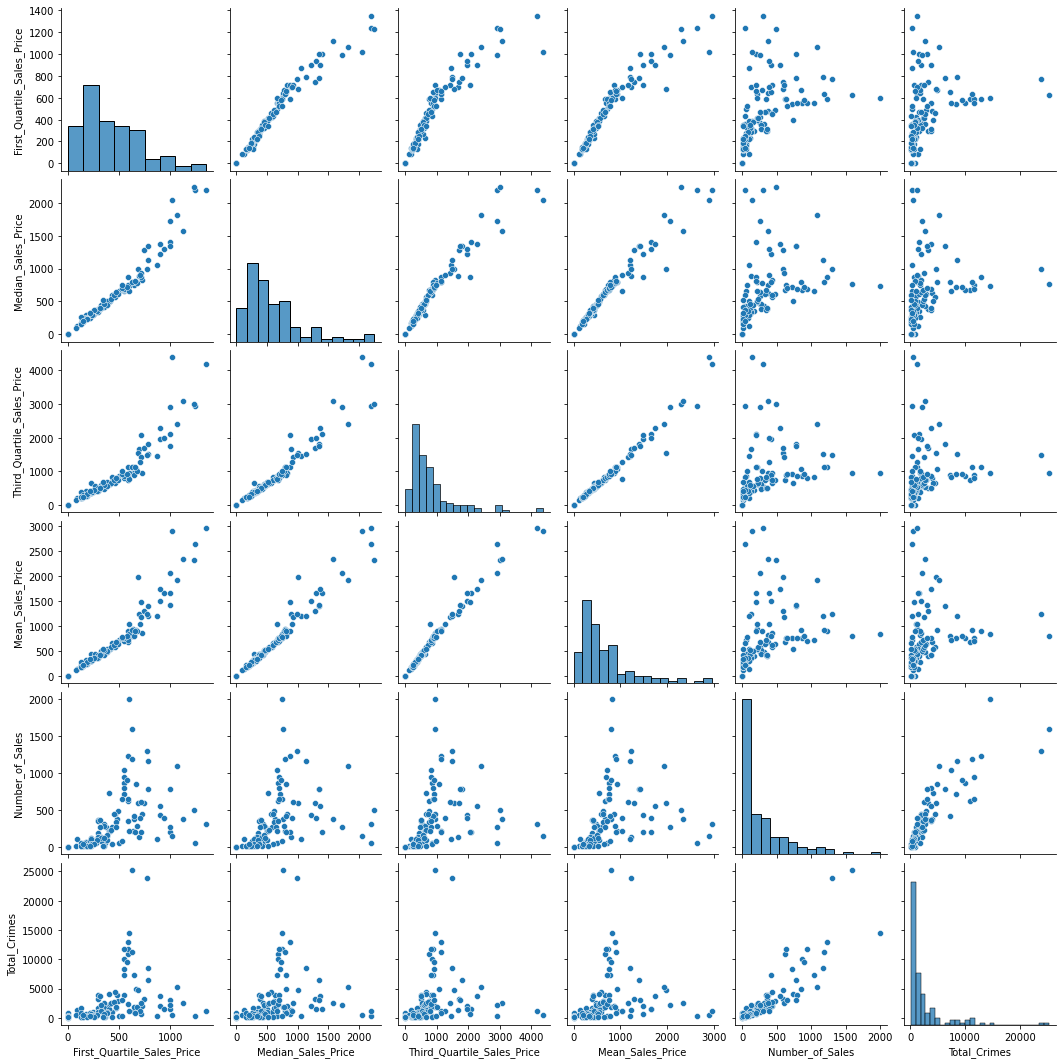

In [52]:
sns.pairplot(df_final)
plt.show()

The above graph is a pairplot, which depicts relationship among all features present in df_final.

In [53]:
model = df_final[['Number_of_Sales','Income_Median','Total_Crimes','Number_of_Earners', 'Median_Sales_Price']]

In [54]:
model.head()

,Number_of_Sales,Income_Median,Total_Crimes,Number_of_Earners,Median_Sales_Price
0,361.0,"47,732",3208.0,"29,898",380.0
1,179.0,"42,220",1636.0,"15,913",355.0
2,218.0,"42,246",1208.0,"25,608",795.0
3,0.0,"46,868",49.0,"1,239",0.0
4,262.0,"49,633",2256.0,"22,346",460.0


In [55]:
model.isna().sum()

Number_of_Sales       0
Income_Median         3
Total_Crimes          3
Number_of_Earners     3
Median_Sales_Price    0
dtype: int64

In [56]:
model = model.fillna(method='bfill')

In [57]:
model = model.replace('[^\d.]','', regex=True).astype(float)

In [58]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(model)
standard_df = pd.DataFrame(standard_df) 
standard_df

,0,1,2,3,4
0,0.196698,0.059188,0.171333,-0.093069,-0.445984
1,-0.305029,-0.587810,-0.213617,-0.401292,-0.499989
2,-0.197516,-0.584758,-0.318426,-0.187619,0.450507
3,-0.798487,-0.042228,-0.602241,-0.724701,-1.266867
4,-0.076220,0.282327,-0.061792,-0.259512,-0.273166
...,...,...,...,...,...
123,0.265617,-0.292600,-0.331159,-0.101598,0.677330
124,-0.241624,0.890120,-0.417112,-0.098182,0.489391
125,1.682583,0.382217,1.708197,1.758365,0.288490
126,0.045077,3.513325,-0.329200,0.124550,3.474813


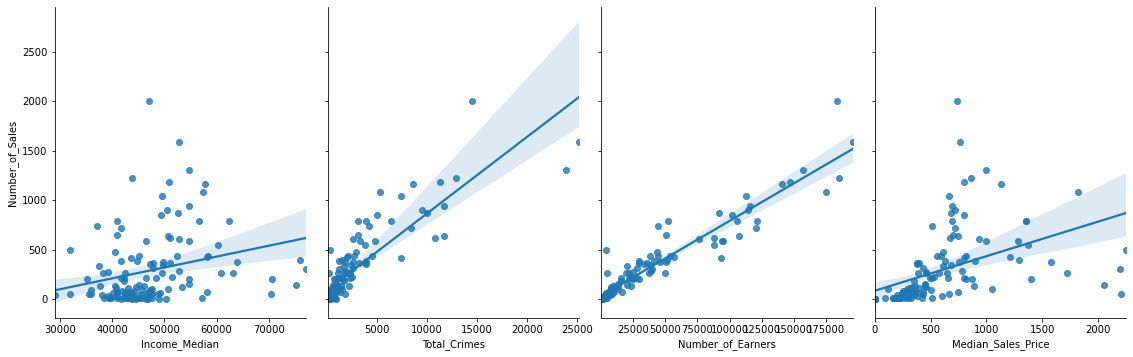

In [59]:
sns.pairplot(model, x_vars=["Income_Median", "Total_Crimes","Number_of_Earners","Median_Sales_Price"], y_vars=["Number_of_Sales"],
             height=5, aspect=.8, kind="reg");

In [60]:
w1 = model[["Number_of_Sales","Income_Median", "Total_Crimes","Number_of_Earners","Median_Sales_Price"]]
w1.corr(method ='pearson')

,Number_of_Sales,Income_Median,Total_Crimes,Number_of_Earners,Median_Sales_Price
Number_of_Sales,1.000000,0.257828,0.867590,0.951558,0.445651
Income_Median,0.257828,1.000000,0.200167,0.339643,0.569614
Total_Crimes,0.867590,0.200167,1.000000,0.874948,0.256084
Number_of_Earners,0.951558,0.339643,0.874948,1.000000,0.475512
Median_Sales_Price,0.445651,0.569614,0.256084,0.475512,1.000000


The above table and graph shows the pairwise correlation between all columns in the dataframe. The above table represents the relationship between number of sales in each LGA and other independent variables like income median, total crime, number of earners and median sales price. Total crime and number of earners have almost perfect positive linear relationship with number of sales as their correlation value is very close to 1. The graph also depicts the same as both the features have positive linear relationship, the data points are quite fit with the linear regression line. Income median and median sales price also have a positive linear relationship with number of sales, but the correlation value is less which means these features are not as significant as the other two features.

In [61]:
train, test = train_test_split(standard_df, test_size=0.2, random_state=42)
print(train.shape)
print(test.shape)

(102, 5)
(26, 5)


In [62]:
X_train = train[[1,2,3,4]]
y_train = train[0]
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-0.11055247  0.26031633  0.72562523  0.11700185] + 0.016006240848044542


In [63]:
predicted_train = reg.predict(X_train)
print("MSE Train:", mean_squared_error(y_train, predicted_train))
print("R Squared Train:", r2_score(y_train, predicted_train))

MSE Train: 0.07770287831874001
R Squared Train: 0.9174689547961803


In [64]:
X_test = test[[1,2,3,4]]
y_test = test[0]
predicted_test = reg.predict(X_test)
print("MSE Test:", mean_squared_error(y_test, predicted_test))
print("R Squared Test:", r2_score(y_test, predicted_test))

MSE Test: 0.12187843041325665
R Squared Test: 0.8969189628633375


Looking at the correlation data and the graphs we see that Total Crimes and Number of Earners are highly correlated with number of sales while Income Median and Median Sales Price do not affect it that much with <0.5 correlation.

Our $R^2$ value is 0.896 on our test data which means 89.6% of the varaition in our independant variable Number of Sales is explained by our 4 predictor variables.

Our $R^2$ and MSE values between train and test vary by 2% suggesting that our data is not really overfitting

### Applying RFE to the Linear Model

In [65]:
#to increment number of features, one at a time
r2_scores = []
for i in range(1,5):
    clf = linear_model.LinearRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    
    rfe.fit(X_train, y_train)
    # predicting on test set
    
    y_pred = rfe.predict(X_test)
    r2_scoree = r2_score(y_test, y_pred)
    # print this
    
    print("R2 on test set using", i, "features: ", r2_scoree)
    # append to the list
    
    r2_scores.append(r2_scoree)

R2 on test set using 1 features:  0.9267089988909973
R2 on test set using 2 features:  0.913569056037592
R2 on test set using 3 features:  0.902296682320713
R2 on test set using 4 features:  0.8969189628633375


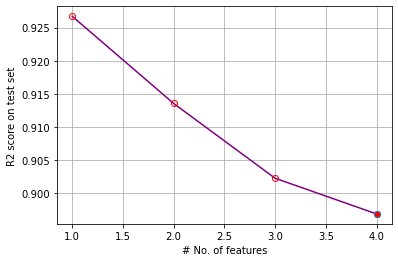

In [66]:
#Estimating accuracy score on test set using RFE by using different number of features

estimator = linear_model.LinearRegression()
r2_scores = []
for i in range(1, 5):
    selector = RFE(estimator, i)
    selector = selector.fit(X_train, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test)
    r2_scoree = r2_score(y_test, predicted)
    r2_scores.append(r2_scoree)
  
best = 1
for item in r2_scores:
    if item < r2_scores[best - 1]:
        best = r2_scores.index(item) + 1

plt.grid()   
plt.xlabel('# No. of features')
plt.ylabel('R2 score on test set')
plt.plot(range(1, 5), r2_scores, marker = 'o', color = 'purple', markeredgewidth = 1 ,markeredgecolor = 'red', markerfacecolor = 'None')
plt.plot(best, r2_scores[best-1], marker = 'o', markerfacecolor = 'red')

We see that the $R^2$ score reduces as the number of features increases which means that the new features being added do not really enhance the model.

Let us find out what is the order of the features.

In [67]:
lr_model = linear_model.LinearRegression()
rfe = RFE(estimator = lr_model, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [68]:
y_hat_test_rfe = rfe.predict(X_test)
print("R2 score on testing set with RFE: ", r2_score(y_test, y_hat_test_rfe))

R2 score on testing set with RFE:  0.9267089988909973


In [69]:
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 4.000
Column: 1, Selected False, Rank: 2.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 3.000


Looking at the above scenario we see that Number of earners is the best predictor for number of sales followed by Crimes and Median Sales Price. Ironically the Income median has the least effect on number of sales in an area at all.

## K-Means Clustering

Let's see if we can cluster various LGAs that might be similar in terms of their Rent cost, Sales cost etc.

For this we will use the K-Means Clustering Algorithm. All the required libraries have already been imported. We are going to cluster our LGAs based on the following criteria:

- Median_Weekly_Rent
- Median_Sales_Price
- Number_of_Sales
- Income_Median
- Total_Crimes

In [70]:
filter8= rent['Dwelling Types'] == "Total"
filter9= rent['Number of Bedrooms'] == "Total"
all_filters3= filter8&filter9
rent2= rent[all_filters3]
rent2 = rent2.reset_index()
rent2 = rent2.drop(['index'], axis=1)
km_df = pd.merge(rent2, df_final, on='LGA', how='outer')
km_df

,LGA,Dwelling Types,Number of Bedrooms,First_Quartile_Weekly_Rent,Median_Weekly_Rent,Third Quartile_Weekly_Rent,New_Bonds_Lodged,Total_Bonds,DwellingType,First_Quartile_Sales_Price,Median_Sales_Price,Third_Quartile_Sales_Price,Mean_Sales_Price,Number_of_Sales,Number_of_Earners,Median_age_of_earners,Income_Sum,Income_Median,Income_Mean,Total_Crimes
0,Albury,Total,Total,270,338.0,400,538,"6,350",Total,299.0,380.0,500.0,403.0,361.0,"29,898",43,"1,68,65,39,002","47,732","56,410",3208.0
1,Armidale Regional,Total,Total,260,320.0,390,374,"3,410",Total,296.0,355.0,455.0,403.0,179.0,"15,913",44,"82,86,31,202","42,220","52,073",1636.0
2,Ballina,Total,Total,450,580.0,680,305,"3,861",Total,635.0,795.0,1143.0,927.0,218.0,"25,608",48,"1,38,05,01,523","42,246","53,909",1208.0
3,Balranald,Total,Total,0,0.0,0,0,109,Total,0.0,0.0,0.0,0.0,0.0,"1,239",45,"6,93,45,495","46,868","55,969",49.0
4,Bathurst Regional,Total,Total,320,375.0,440,361,"4,228",Total,371.0,460.0,550.0,472.0,262.0,"22,346",44,"1,30,18,20,483","49,633","58,257",2256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Wingecarribee,Total,Total,443,545.0,650,282,"3,077",Total,702.0,900.0,1280.0,1035.0,386.0,"29,511",49,"1,87,06,11,314","44,735","63,387",1156.0
124,Wollondilly,Total,Total,383,450.0,550,178,"2,370",Total,661.0,813.0,1129.0,900.0,202.0,"29,666",43,"1,93,09,27,957","54,811","65,089",805.0
125,Wollongong,Total,Total,380,480.0,575,"1,716","19,409",Total,577.0,720.0,922.0,793.0,900.0,"1,13,903",43,"7,13,85,41,170","50,484","62,672",9484.0
126,Woollahra,Total,Total,500,700.0,1050,869,"8,957",Total,1350.0,2195.0,4175.0,2951.0,306.0,"39,772",44,"6,86,55,00,179","77,159","1,72,621",1164.0


In [71]:
km_df.isna().sum()

LGA                           0
Dwelling Types                0
Number of Bedrooms            0
First_Quartile_Weekly_Rent    0
Median_Weekly_Rent            0
Third Quartile_Weekly_Rent    0
New_Bonds_Lodged              0
Total_Bonds                   0
DwellingType                  0
First_Quartile_Sales_Price    0
Median_Sales_Price            0
Third_Quartile_Sales_Price    0
Mean_Sales_Price              0
Number_of_Sales               0
Number_of_Earners             3
Median_age_of_earners         3
Income_Sum                    3
Income_Median                 3
Income_Mean                   3
Total_Crimes                  3
dtype: int64

In [72]:
km_df = km_df.fillna(method='bfill')

In [73]:
km_df = km_df.drop(columns = ["Dwelling Types", "Number of Bedrooms", "DwellingType", "First_Quartile_Weekly_Rent",
                               "Third Quartile_Weekly_Rent","First_Quartile_Sales_Price", "Third_Quartile_Sales_Price",
                               "Mean_Sales_Price", "Income_Sum", "Income_Mean", "Number_of_Earners", "New_Bonds_Lodged",
                                "Median_age_of_earners", "Total_Bonds"])
km_df.head(10)

,LGA,Median_Weekly_Rent,Median_Sales_Price,Number_of_Sales,Income_Median,Total_Crimes
0,Albury,338.0,380.0,361.0,"47,732",3208.0
1,Armidale Regional,320.0,355.0,179.0,"42,220",1636.0
2,Ballina,580.0,795.0,218.0,"42,246",1208.0
3,Balranald,0.0,0.0,0.0,"46,868",49.0
4,Bathurst Regional,375.0,460.0,262.0,"49,633",2256.0
5,Bayside,520.0,800.0,853.0,"49,445",4934.0
6,Bega Valley,400.0,580.0,260.0,"38,318",1019.0
7,Bellingen,430.0,665.0,54.0,"35,924",366.0
8,Berrigan,270.0,320.0,63.0,"40,157",261.0
9,Blacktown,440.0,760.0,1589.0,"52,802",25261.0


In [74]:
km_df = km_df.set_index('LGA')

In [75]:
km_df = km_df.replace('[^\d.]','', regex=True).astype(float)

In [76]:
km_df

,Median_Weekly_Rent,Median_Sales_Price,Number_of_Sales,Income_Median,Total_Crimes
LGA,,,,,
Albury,338.0,380.0,361.0,47732.0,3208.0
Armidale Regional,320.0,355.0,179.0,42220.0,1636.0
Ballina,580.0,795.0,218.0,42246.0,1208.0
Balranald,0.0,0.0,0.0,46868.0,49.0
Bathurst Regional,375.0,460.0,262.0,49633.0,2256.0
...,...,...,...,...,...
Wingecarribee,545.0,900.0,386.0,44735.0,1156.0
Wollondilly,450.0,813.0,202.0,54811.0,805.0
Wollongong,480.0,720.0,900.0,50484.0,9484.0


First let's try finding out the number of clusters using Hierarchical clustering and create a dendogram to find out the number of natural clusters present in the data.

In [77]:
dist = pdist(km_df, 'euclidean')
linkage_matrix = linkage(dist, method = 'complete')

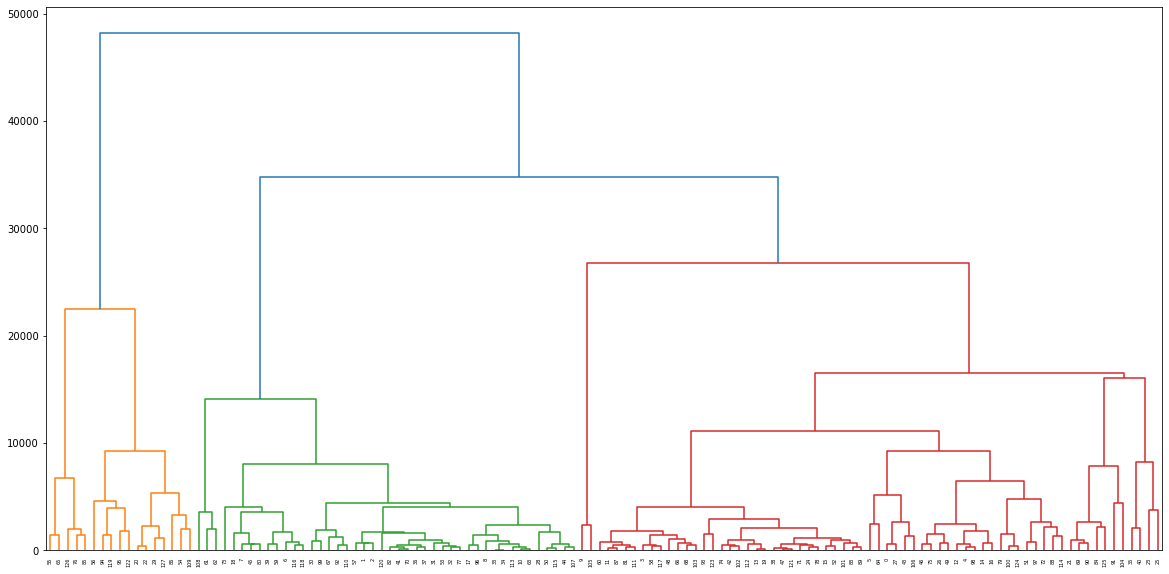

In [78]:
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix)
plt.show()

From the above plot, we can see that we need 3 clusters to perform our analysis. This data would now be clustered using the kMeans approach. The first step is to isolate the data's numerical fields.  

In [79]:
km = KMeans(n_clusters = 3)
km.fit(km_df)

KMeans(n_clusters=3)

After we used kMeans, we now have some results to look at. The objective here is to comprehend the clusters that have been generated. 

The first step is to figure out what belongs to which cluster. To do so, we run km.predict() on the original data and add a set of cluster labels to the data frame. Investigate the differences between each cluster now:

In [80]:
km_df["label"] = km.predict(km_df)

In [81]:
km_df[km_df["label"] == 0]

,Median_Weekly_Rent,Median_Sales_Price,Number_of_Sales,Income_Median,Total_Crimes,label
LGA,,,,,,
Albury,338.0,380.0,361.0,47732.0,3208.0,0
Bathurst Regional,375.0,460.0,262.0,49633.0,2256.0,0
Bayside,520.0,800.0,853.0,49445.0,4934.0,0
Blacktown,440.0,760.0,1589.0,52802.0,25261.0,0
Blue Mountains,470.0,755.0,379.0,49788.0,1761.0,0
Bourke,240.0,0.0,0.0,50405.0,813.0,0
Broken Hill,250.0,120.0,107.0,50628.0,1412.0,0
Camden,540.0,821.0,439.0,58416.0,2012.0,0
Campbelltown,420.0,675.0,621.0,51038.0,10825.0,0


In [82]:
km_df[km_df["label"] == 1]

,Median_Weekly_Rent,Median_Sales_Price,Number_of_Sales,Income_Median,Total_Crimes,label
LGA,,,,,,
Armidale Regional,320.0,355.0,179.0,42220.0,1636.0,1
Ballina,580.0,795.0,218.0,42246.0,1208.0,1
Balranald,0.0,0.0,0.0,46868.0,49.0,1
Bega Valley,400.0,580.0,260.0,38318.0,1019.0,1
Bellingen,430.0,665.0,54.0,35924.0,366.0,1
...,...,...,...,...,...,...
Warren,250.0,0.0,0.0,46512.0,160.0,1
Warrumbungle Shire,230.0,200.0,43.0,38009.0,472.0,1
Weddin,0.0,0.0,0.0,41625.0,112.0,1


In [83]:
km_df[km_df["label"] == 2]

,Median_Weekly_Rent,Median_Sales_Price,Number_of_Sales,Income_Median,Total_Crimes,label
LGA,,,,,,
Hunters Hill,595.0,2200.0,49.0,70458.0,303.0,2
Inner West,490.0,1350.0,785.0,62468.0,6391.0,2
Lane Cove,530.0,875.0,199.0,70686.0,620.0,2
Mosman,600.0,2050.0,145.0,75311.0,509.0,2
North Sydney,560.0,1295.0,394.0,76063.0,1471.0,2
Queanbeyan-Palerang Regional,450.0,645.0,263.0,63094.0,1874.0,2
Randwick,550.0,1370.0,547.0,60208.0,3780.0,2
Waverley,695.0,1580.0,371.0,63934.0,2582.0,2
Willoughby,558.0,1725.0,263.0,60792.0,2140.0,2


#### We find the mean value for each column by cluster using the groupby technique.

In [84]:
km_df_mean = km_df.groupby(["label"]).agg('mean')
km_df_mean.head()

,Median_Weekly_Rent,Median_Sales_Price,Number_of_Sales,Income_Median,Total_Crimes
label,,,,,
0,424.048780,676.756098,565.634146,51820.902439,5449.292683
1,329.298701,416.025974,137.168831,42082.116883,997.558442
2,572.800000,1528.500000,332.200000,68017.300000,2083.400000


- We can see now that Cluster 1 have relatively low weekly rent, sales price, and income as compared to the other two clusters.
- Cluster 2 has the highest income as compared to the other two clusters whereas Cluster 0 lies somewhere between the other two with respect to the attributes. We can see that Cluster 0 has the highest crime rate. 

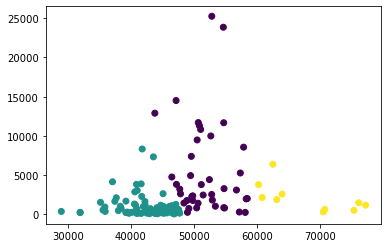

In [85]:
plt.scatter(km_df['Income_Median'], km_df['Total_Crimes'], c = km_df['label'])
plt.show()

The dataset is distributed into 3 clusters. Income median and Total crimes are divided with respect to these three clusters.

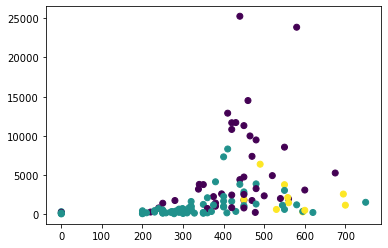

In [86]:
plt.scatter(km_df['Median_Weekly_Rent'], km_df['Total_Crimes'], c = km_df['label'])
plt.show()

The dataset is distributed into 3 clusters. Median Weekly Rent and Total crimes are divided with respect to these three clusters.

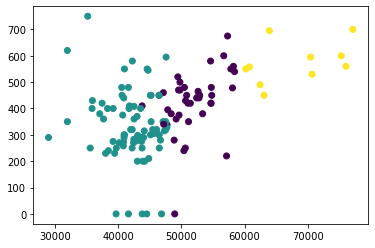

In [87]:
plt.scatter(km_df['Income_Median'], km_df['Median_Weekly_Rent'], c = km_df['label'])
plt.show()

The dataset is distributed into 3 clusters. Income median and Median Weekly Rent are divided with respect to these three clusters.

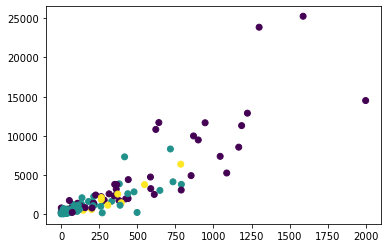

In [88]:
plt.scatter(km_df['Number_of_Sales'], km_df['Total_Crimes'], c = km_df['label'])
plt.show()

The dataset is distributed into 3 clusters. Number of sales and Total Crime are divided with respect to these three clusters.

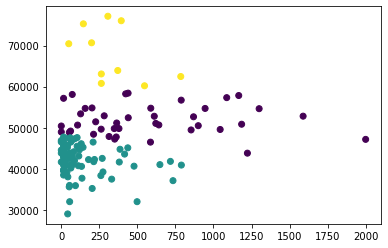

In [89]:
plt.scatter(km_df['Number_of_Sales'], km_df['Income_Median'], c = km_df['label'])
plt.show()

The dataset is distributed into 3 clusters. Income median and Number of Sales are divided with respect to these three clusters.

## KNN Classification

Now that we have the data for the various LGA's in multiple classes/clusters. We can create a Supervised learning K-nearest neighbour model which can predict which cluster a particular LGA belongs to based on the input data.

In [90]:
X = km_df[['Median_Weekly_Rent','Median_Sales_Price','Number_of_Sales','Income_Median','Total_Crimes']]
y = km_df[['label']]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [92]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Initially we will try a 1-Nearest Neighbour model and then use a Cross Validation technique to help determine the ideal K.

In [93]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [94]:
y_pred = classifier.predict(X_test)

In [95]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  1  0]
 [ 0 13  0]
 [ 1  0  2]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.93      1.00      0.96        13
           2       1.00      0.67      0.80         3

    accuracy                           0.92        26
   macro avg       0.94      0.86      0.89        26
weighted avg       0.93      0.92      0.92        26



We get a confusion Matrix as follows:

||Predicted 0|Predicted 1|Predicted 2|Total Actual||
|---|---|---|---|---|---|
|Actual 0|9|1|0|10|(Actual 0)
|Actual 1|0|13|0|13|(Actual 1)
|Actual 2|1|0|2|3|(Actual 2)
|Total Predicted|10|14|2|26|Total Population
||(Predicted 0)|(Predicted 1)|(Predicted 2)|(Total Population)|

Here we see a classification report.

Our precision for each class signifies the ratio true positives (correct classifications) to the total predictions for that class. For our entire model we see a Precisions core of 0.94.

Recall is defined as the ratio of true positives to the sum of true positives and false negatives. For our model we see a Recall score of 0.86.

The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is. Our model has a f1-score of 0.89.

Support is the total number of actual occurences of the particular class in the model.

In [96]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = %.5f" % accuracy)

Accuracy = 0.92308


We see we get an accuracy score of 0.923 which means that our model can classify data pretty well.

### Automated Paramter Tuning using GridSearch Cross Validation

We are using CV method to tune the hyperparameter $K$ using the above training and test data to find the best value for $K$ with the highest accuracy score

We will run a 5-fold Cross Validation to evaluate our model due to our low-data situation.

In [97]:
k_range = range(1, 135, 5)
parameter_grid = {'n_neighbors': range(1, 135, 5)}
classifier = KNeighborsClassifier()
gs_knn =GridSearchCV(classifier, parameter_grid, scoring= 'accuracy', cv=KFold(n_splits=5, shuffle=False))
gs_knn.fit(X, y)
print ('Best K value: ', gs_knn.best_params_['n_neighbors'])
print("Accuracy is: %.4f\n" % gs_knn.best_score_)

Best K value:  1
Accuracy is: 0.9846



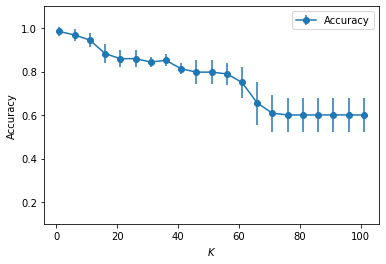

In [98]:
cv_scores_means = gs_knn.cv_results_['mean_test_score']
cv_scores_stds = gs_knn.cv_results_['std_test_score']

# plot the relationship
plt.errorbar(k_range, cv_scores_means, yerr=cv_scores_stds, marker='o', label='Accuracy')
plt.ylim([0.1, 1.1])
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

From the above graph we see that the accuracy score decreases as we increas K-value and it massively drops at around $K$ = 65 possibly due to underfitting at that K value.

## Conclusion and Future Improvements

In line with our goals for this project we were able to fit a Linear Regression model to predict the number of sales in any LGA in New South Wales based on the Median income and total number of crimes. We found that number of earners has a high positive correlation with the number of sales. As there are more earners, the earnings in each household also increases. This enables them to invest their money to buy properties and hence we see an increase in number of house sales.

Using the KMeans clustering alogrithm, we see 3 distinct clusters to divide the various LGA's distinguishable based on Income, House Sales price, Weekly Rent and Number of sales.These clusters could be labeled as "Lower Middle Class", "Upper Middle Class" and "Rich Class". One unique feature we noticed is the number of crimes in the 'Upper Middle Class' region is the highest and the 'Rich Class' area it is the 2nd highest. This could be due to the better security features in the 'Rich Class' area.

Based on this clustering we then created a K-Nearest Neighbour model to classify the regions. We split our data into train and test and created a model with an accuracy score of 0.92. This model hopefully could classify LGA's in other regions.

While the models we created do seem to have a high accuracy, it is possible this is due to a slight overfitting issue as our datasize is small. There could be various other factors that could be affecting the output we wished to achieve.

Moving forward we would build on this project by adding more features affecting the Sales and Rent in different LGA and by using data from all the years that it is avalaible.
